In [ ]:
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
##para uso no matplot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima


In [11]:
df = pd.read_csv("AirPassengers.csv", sep=",")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [12]:
from pandas._config import dates
#convertendo de object para datetime
dataparse = lambda dates: datetime.strptime(dates, "%Y-%m") #aplicando uma mascara para os dados
#chamando novamente a base da de dados mas com a coluna month ja convertida
base = pd.read_csv("AirPassengers.csv", parse_dates = ["Month"],
                   index_col = 'Month', date_parser = dataparse)
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [17]:
### CONFIGURANDO O ARIMA PARA PREDIÇÃO - atentar ao stepwise=True que limita a busca para ser mais agil porem pode prejudicar a qualidade da predição
stepwise_model = auto_arima(base, start_p=1, stat_q =1, start_d=0, start_P=0, max_q=6, max_p = 6, m = 12, seasonal=True,stepwise=True)

In [18]:
print(stepwise_model.aic())

1019.1780567487713


In [ ]:
plot_acf

In [19]:
###Separando base de treino e teste
##Treino tera mais dados que a de teste por motivos obvios
train = base.loc["1949-01-01":"1959-12-01"]
test = base.loc["1960-01-01":]

In [20]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [21]:
future_forecast = stepwise_model.predict(n_periods=12)
future_forecast

<Axes: >

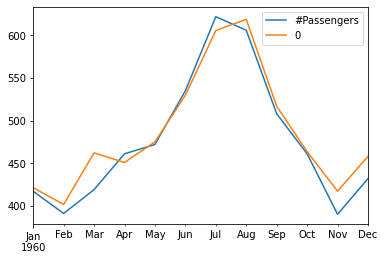

In [22]:
pd.concat([test,future_forecast], axis=1).plot()

## Reflexoes
# na base de dados tinhas 30 anos registrados e usamos 20 para treino e os outros 10 para teste isso para conseguirmos comparar a qualidade da nossa previsão
]